# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [55]:
# Dependencies and Setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | kapuskasing
Processing Record 3 of Set 1 | la grande
Processing Record 4 of Set 1 | akureyri
Processing Record 5 of Set 1 | paradip garh
Processing Record 6 of Set 1 | nyaungdon
Processing Record 7 of Set 1 | jayapura
Processing Record 8 of Set 1 | lerwick
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | mount isa
Processing Record 15 of Set 1 | gadzhiyevo
Processing Record 16 of Set 1 | madimba
Processing Record 17 of Set 1 | quartu sant'elena
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | ntossoni
City not found. Skipping...
Processing Record 21 of Set 1 | lihue
Processing Reco

Processing Record 41 of Set 4 | lovington
Processing Record 42 of Set 4 | vorgashor
Processing Record 43 of Set 4 | polyarnyy
Processing Record 44 of Set 4 | porto novo
Processing Record 45 of Set 4 | susuman
Processing Record 46 of Set 4 | charters towers
Processing Record 47 of Set 4 | numan
Processing Record 48 of Set 4 | puerto aysen
Processing Record 49 of Set 4 | east london
Processing Record 0 of Set 5 | ciudad lazaro cardenas
Processing Record 1 of Set 5 | labrador city
Processing Record 2 of Set 5 | la sarre
Processing Record 3 of Set 5 | pandan
Processing Record 4 of Set 5 | fernie
Processing Record 5 of Set 5 | nishinoomote
Processing Record 6 of Set 5 | zhezqazghan
Processing Record 7 of Set 5 | tazovsky
Processing Record 8 of Set 5 | el calafate
Processing Record 9 of Set 5 | kirando
Processing Record 10 of Set 5 | igarka
Processing Record 11 of Set 5 | flying fish cove
Processing Record 12 of Set 5 | bornu yassu
Processing Record 13 of Set 5 | vadso
Processing Record 14 o

Processing Record 32 of Set 8 | kichmengskiy gorodok
Processing Record 33 of Set 8 | peace river
Processing Record 34 of Set 8 | selfoss
Processing Record 35 of Set 8 | srandakan
Processing Record 36 of Set 8 | den burg
Processing Record 37 of Set 8 | rawlins
Processing Record 38 of Set 8 | ixtapa
Processing Record 39 of Set 8 | sogne
Processing Record 40 of Set 8 | badger
Processing Record 41 of Set 8 | autazes
Processing Record 42 of Set 8 | queenstown
Processing Record 43 of Set 8 | fada
Processing Record 44 of Set 8 | bol
Processing Record 45 of Set 8 | rondonopolis
Processing Record 46 of Set 8 | puerto del rosario
Processing Record 47 of Set 8 | margate
Processing Record 48 of Set 8 | port elizabeth
Processing Record 49 of Set 8 | hammerfest
Processing Record 0 of Set 9 | khandyga
Processing Record 1 of Set 9 | venado
Processing Record 2 of Set 9 | simpang
Processing Record 3 of Set 9 | daru
Processing Record 4 of Set 9 | sansepolcro
Processing Record 5 of Set 9 | sandnessjoen
Pr

Processing Record 22 of Set 12 | boyolangu
Processing Record 23 of Set 12 | yerofey pavlovich
Processing Record 24 of Set 12 | forster
Processing Record 25 of Set 12 | faya-largeau
Processing Record 26 of Set 12 | paita
Processing Record 27 of Set 12 | cuddapah
Processing Record 28 of Set 12 | port said
Processing Record 29 of Set 12 | kuala terengganu
Processing Record 30 of Set 12 | cuauhtemoc
Processing Record 31 of Set 12 | chul'man
Processing Record 32 of Set 12 | twon-brass
Processing Record 33 of Set 12 | preobrazheniye
Processing Record 34 of Set 12 | calbuco
Processing Record 35 of Set 12 | nacala
Processing Record 36 of Set 12 | hillsboro
Processing Record 37 of Set 12 | burang
Processing Record 38 of Set 12 | puerto carreno
Processing Record 39 of Set 12 | village of oak creek (big park)
Processing Record 40 of Set 12 | jose de freitas
Processing Record 41 of Set 12 | goz beida
Processing Record 42 of Set 12 | ghansor
Processing Record 43 of Set 12 | mar del plata
Processing

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,0.23,99,100,6.66,GL,1685133408
1,kapuskasing,49.4169,-82.4331,26.05,24,100,5.66,CA,1685133336
2,la grande,45.3246,-118.0877,22.23,45,89,4.03,US,1685133504
3,akureyri,65.6835,-18.0878,10.96,58,75,9.26,IS,1685133410
4,paradip garh,20.3167,86.6167,28.53,90,4,2.49,IN,1685133505


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,0.23,99,100,6.66,GL,1685133408
1,kapuskasing,49.4169,-82.4331,26.05,24,100,5.66,CA,1685133336
2,la grande,45.3246,-118.0877,22.23,45,89,4.03,US,1685133504
3,akureyri,65.6835,-18.0878,10.96,58,75,9.26,IS,1685133410
4,paradip garh,20.3167,86.6167,28.53,90,4,2.49,IN,1685133505


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

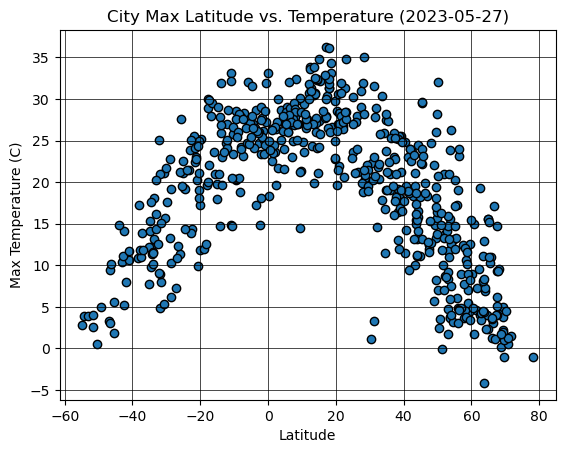

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-05-27)")

# Define the y-values for the horizontal lines
y_values = [-5, 10, 5, 15, 0, 20, 25, 30, 35]

# Add horizontal lines
for y in y_values:
    plt.axhline(y, color='black', linewidth=0.5)

# Define the x-values for the vertical lines
x_values = [-60, -40, -20, 0, 20, 40, 60, 80]

# Add vertical lines
for x in x_values:
    plt.axvline(x, color='black', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

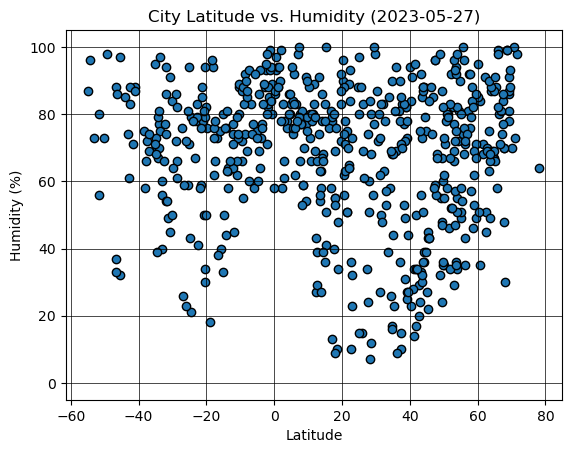

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df['Humidity'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-05-27)")

# Define the y-values for the horizontal lines
y_values = [0, 20, 40, 60, 80, 100]

# Add horizontal lines
for y in y_values:
    plt.axhline(y, color='black', linewidth=0.5)

# Define the x-values for the vertical lines
x_values = [-60, -40, -20, 0, 20, 40, 60, 80]

# Add vertical lines
for x in x_values:
    plt.axvline(x, color='black', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

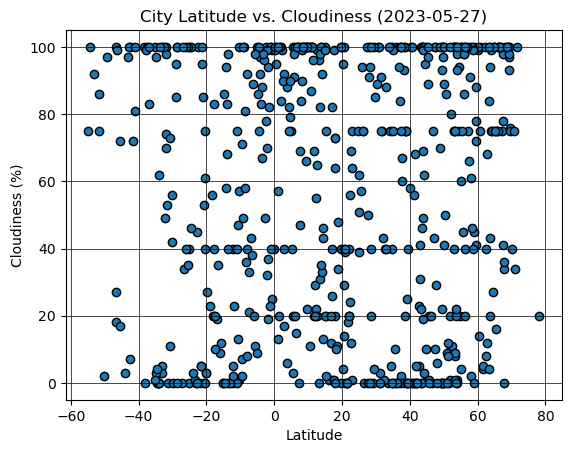

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-05-27)")

# Define the y-values for the horizontal lines
y_values = [0, 20, 40, 60, 80, 100]

# Add horizontal lines
for y in y_values:
    plt.axhline(y, color='black', linewidth=0.5)

# Define the x-values for the vertical lines
x_values = [-60, -40, -20, 0, 20, 40, 60, 80]

# Add vertical lines
for x in x_values:
    plt.axvline(x, color='black', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

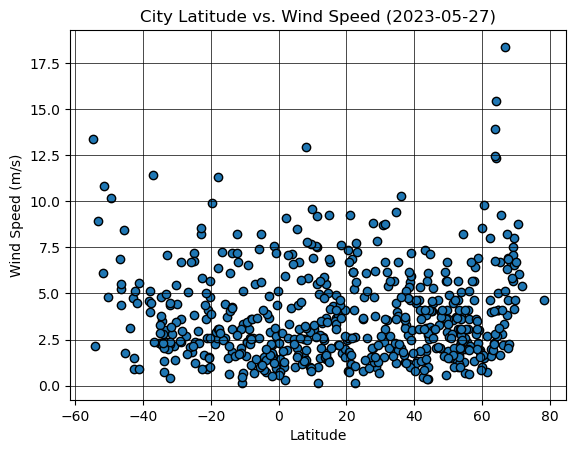

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-05-27)")

# Define the y-values for the horizontal lines
y_values = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5]

# Add horizontal lines
for y in y_values:
    plt.axhline(y, color='black', linewidth=0.5)

# Define the x-values for the vertical lines
x_values = [-60, -40, -20, 0, 20, 40, 60, 80]

# Add vertical lines
for x in x_values:
    plt.axvline(x, color='black', linewidth=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [89]:
# Define a function to create Linear Regression plots
def regression_plot(x, y, xlabel, ylabel):
    # Calculate the regression line
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept

    # Create a scatter plot
    plt.scatter(x, y)

    # Plot the regression line
    plt.plot(x, regression_line, color='red')

    # Set the plot labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Calculate the r value
    r_value, _ = pearsonr(x, y)
    print("The r value is: {:.2f}".format(r_value))
    
    # Add slope formula annotation
    equation = "Y = {:.2f}X + {:.2f}".format(slope, intercept)
    plt.text(0.5, 0.1, equation, color='red', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', edgecolor='white'))
    
    # Show the plot
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,0.23,99,100,6.66,GL,1685133408
1,kapuskasing,49.4169,-82.4331,26.05,24,100,5.66,CA,1685133336
2,la grande,45.3246,-118.0877,22.23,45,89,4.03,US,1685133504
3,akureyri,65.6835,-18.0878,10.96,58,75,9.26,IS,1685133410
4,paradip garh,20.3167,86.6167,28.53,90,4,2.49,IN,1685133505


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,jayapura,-2.5333,140.7000,24.66,93,100,2.92,ID,1685133505
10,grytviken,-54.2811,-36.5092,3.88,96,100,2.15,GS,1685133270
11,port-aux-francais,-49.3500,70.2167,4.97,98,97,10.16,TF,1685133270
12,blackmans bay,-43.0167,147.3167,10.41,74,97,4.76,AU,1685133378
13,mount isa,-20.7333,139.5000,9.87,50,0,4.12,AU,1685133506


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.80


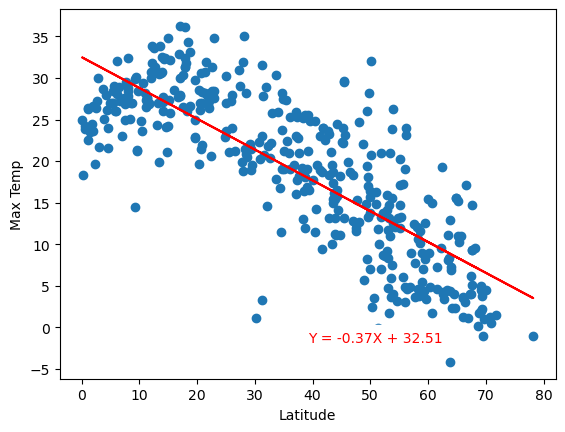

In [90]:
# Linear regression on Northern Hemisphere

# Extract x and y variables from northern_hemi_df
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

xlabel = "Latitude"
ylabel = "Max Temp"

# Call the regression_plot function
regression_plot(x, y, xlabel, ylabel)

The r value is: 0.81


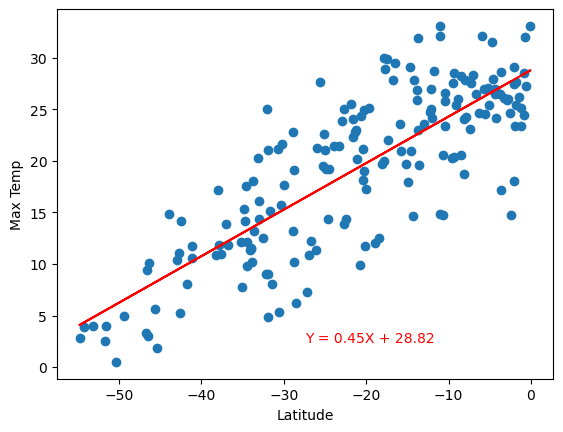

In [91]:
# Linear regression on Southern Hemisphere

# Extract x and y variables from southern_hemi_df
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

xlabel = "Latitude"
ylabel = "Max Temp"

# Call the regression_plot function
regression_plot(x, y, xlabel, ylabel)

There is a strong positive relationship between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r value is: -0.02


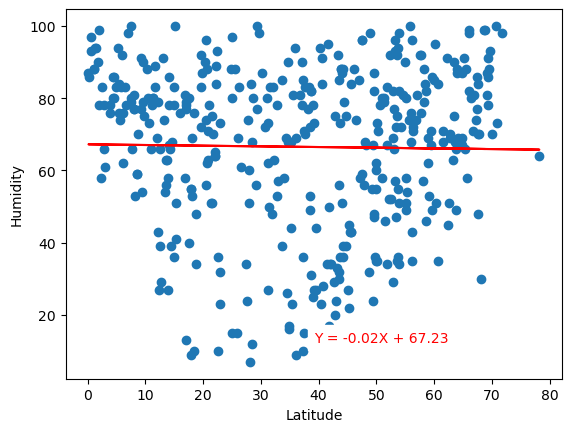

In [93]:
# Northern Hemisphere

# Extract x and y variables from northern_hemi_df
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

xlabel = "Latitude"
ylabel = "Humidity"

# Call the regression_plot function
regression_plot(x, y, xlabel, ylabel)

The r value is: 0.14


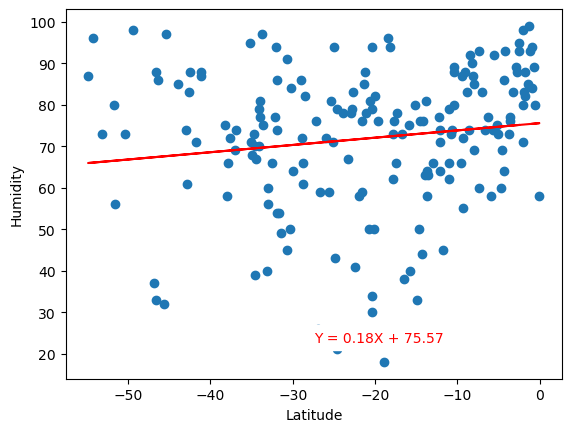

In [94]:
# Southern Hemisphere

# Extract x and y variables from southern_hemi_df
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

xlabel = "Latitude"
ylabel = "Humidity"

# Call the regression_plot function
regression_plot(x, y, xlabel, ylabel)

There is no relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.02


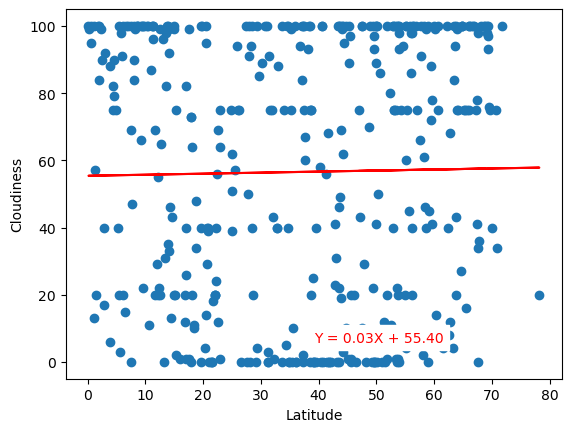

In [95]:
# Northern Hemisphere

# Extract x and y variables from northern_hemi_df
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

xlabel = "Latitude"
ylabel = "Cloudiness"

# Call the regression_plot function
regression_plot(x, y, xlabel, ylabel)

The r value is: -0.03


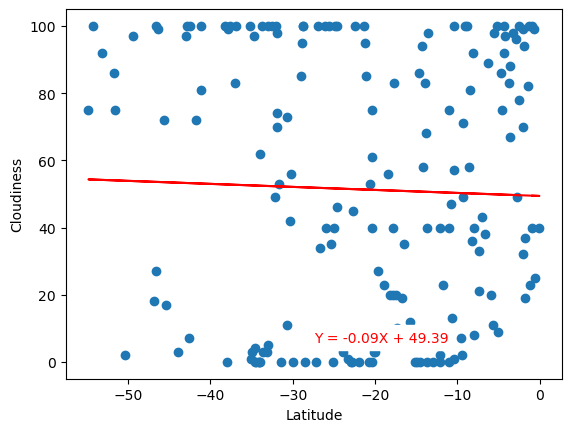

In [96]:
# Southern Hemisphere

# Extract x and y variables from southern_hemi_df
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

xlabel = "Latitude"
ylabel = "Cloudiness"

# Call the regression_plot function
regression_plot(x, y, xlabel, ylabel)

There is no relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.11


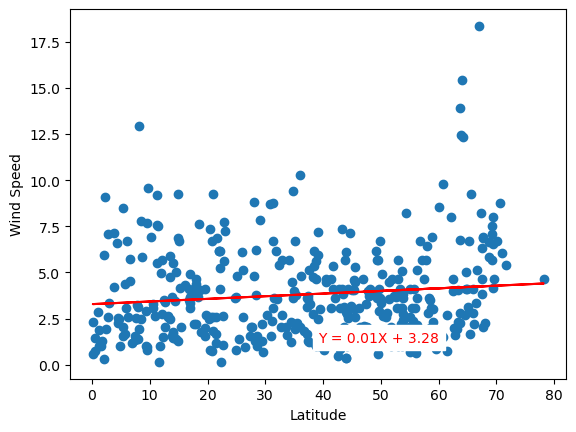

In [97]:
# Northern Hemisphere

# Extract x and y variables from northern_hemi_df
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

xlabel = "Latitude"
ylabel = "Wind Speed"

# Call the regression_plot function
regression_plot(x, y, xlabel, ylabel)

The r value is: -0.27


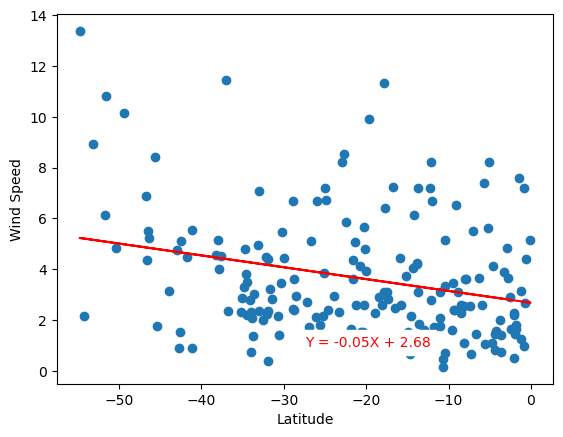

In [98]:
# Southern Hemisphere

# Extract x and y variables from southern_hemi_df
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

xlabel = "Latitude"
ylabel = "Wind Speed"

# Call the regression_plot function
regression_plot(x, y, xlabel, ylabel)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

There is no relationship between latitude and wind speed.